In [125]:
# Download das imagens a serem utilizadas

!wget https://people.math.sc.edu/Burkardt/data/tif/cameraman.tif

--2021-03-16 20:28:59--  https://people.math.sc.edu/Burkardt/data/tif/cameraman.tif
Resolving people.math.sc.edu (people.math.sc.edu)... 129.252.1.14
Connecting to people.math.sc.edu (people.math.sc.edu)|129.252.1.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65240 (64K) [image/tiff]
Saving to: ‘cameraman.tif.3’

cameraman.tif.3     100%[===================>]  63.71K   308KB/s    in 0.2s    

2021-03-16 20:28:59 (308 KB/s) - ‘cameraman.tif.3’ saved [65240/65240]



In [126]:
import imageio
import numpy as np
import scipy as sp
import math
import cmath
import matplotlib.pyplot as plt

In [127]:
def plot1(image, colormap="gray", vmin=None, vmax=None):
  imgplot = plt.imshow(image, cmap=colormap, vmin=vmin, vmax=vmax)
  plt.show()

def plot2(firstimage, secondimage, firstlabel=None, secondlabel=None, colormap="gray", vmin=None, vmax=None):
  figure = plt.figure(figsize=(10,10))

  imgplot = figure.add_subplot(1,2,1)
  plt.imshow(firstimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(firstlabel)

  imgplot = figure.add_subplot(1,2,2)
  plt.imshow(secondimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(secondlabel)

def plot4(firstimage, secondimage, thirdimage, fourthimage, firstlabel=None, secondlabel=None, thirdlabel=None, fourthlabel=None, colormap="gray", vmin=None, vmax=None):
  figure = plt.figure(figsize=(15,15))

  imgplot = figure.add_subplot(1,4,1)
  plt.imshow(firstimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(firstlabel)

  imgplot = figure.add_subplot(1,4,2)
  plt.imshow(secondimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(secondlabel)

  imgplot = figure.add_subplot(1,4,3)
  plt.imshow(thirdimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(thirdlabel)

  imgplot = figure.add_subplot(1,4,4)
  plt.imshow(fourthimage, cmap=colormap, vmin=vmin, vmax=vmax)
  imgplot.set_xlabel(fourthlabel) 

# Questão 1

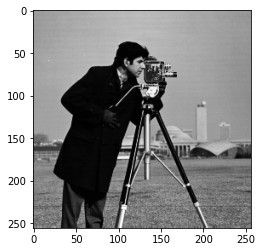

In [128]:
img_cman = imageio.imread("cameraman.tif")
plot1(img_cman)

# Questão 2

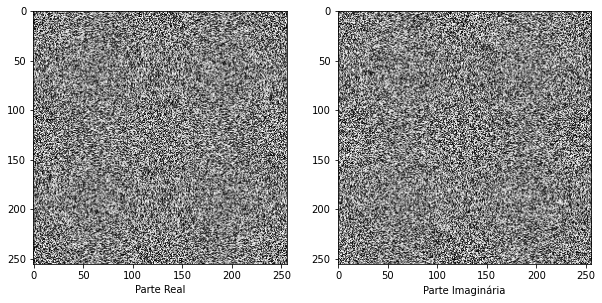

In [129]:
ft_cman = np.fft.fft2(img_cman)

# coeficientes reais são os coeficientes au
img_real = imageio.core.util.Array(np.uint8(ft_cman.real))

# coeficientes imaginarios são coeficientes bu
img_imag = imageio.core.util.Array(np.uint8(ft_cman.imag))

plot2(img_real, img_imag, "Parte Real", "Parte Imaginária")

# Questão 3

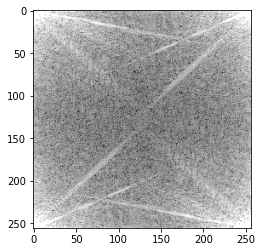

In [130]:
ft_cman_2 = imageio.core.util.Array(np.uint8(np.log(np.abs(ft_cman))))

plot1(ft_cman_2, colormap="gray", vmin=3, vmax=10)

# Questão 4

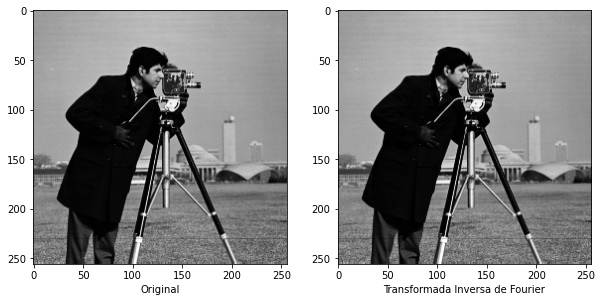

In [131]:
ift_cman = np.fft.ifft2(ft_cman)

# como a parte complexa da imagem original era vazia (pois era um número real), a parte imaginária pode ser desconsiderada para evitar warnings da biblioteca
plot2(img_cman, imageio.core.util.Array(np.uint8(ift_cman.real)), "Original", "Transformada Inversa de Fourier")

# Questão 5

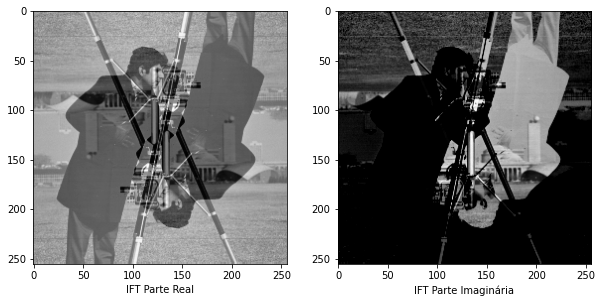

In [132]:
i = np.lib.scimath.sqrt(-1)

ift_cman_real = np.fft.ifft2(ft_cman.real)
ift_cman_imag = np.fft.ifft2(ft_cman.imag * i)

plot2(np.uint8(ift_cman_real.real), np.uint8(np.clip(ift_cman_imag.real, 0, 255)), "IFT Parte Real", "IFT Parte Imaginária")

# Questão 6

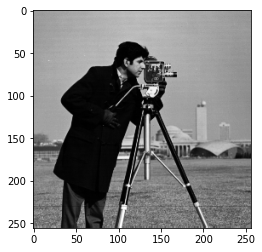

In [133]:
img_cman_sum = ift_cman_real.real + ift_cman_imag.real

plot1(np.uint8(img_cman_sum))

# Questão 7

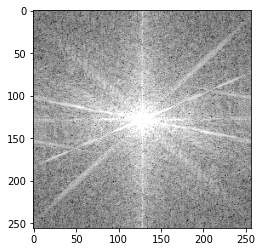

In [134]:
shifted_image_ft = np.fft.fftshift(ft_cman)

# espectro deslocado
plot1(np.uint8(np.log(np.abs(shifted_image_ft))), vmin=3, vmax=10)

# Questão 8

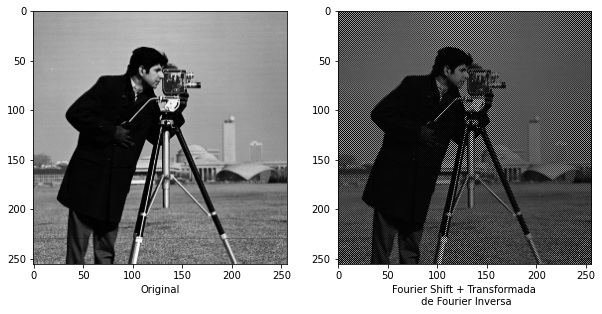

In [135]:
shifted_image_ift = np.fft.ifft2(shifted_image_ft)

plot2(img_cman, np.uint8(np.clip(shifted_image_ift.real, 0, 255)), "Original", "Fourier Shift + Transformada\n de Fourier Inversa")

# Questão 9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


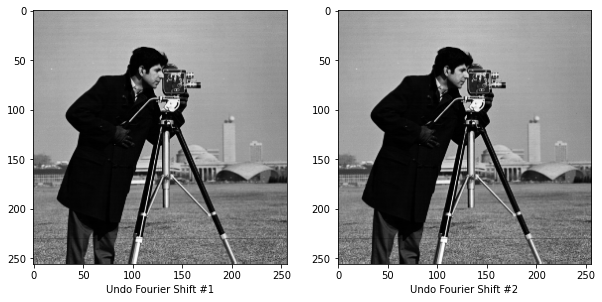

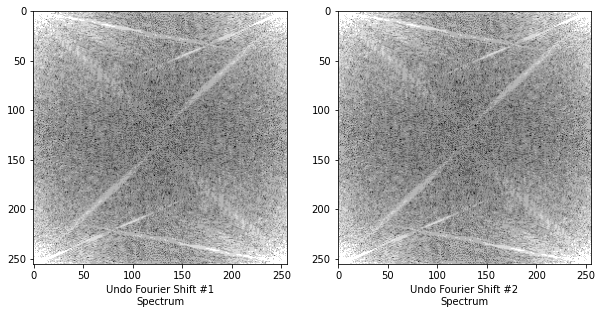

In [136]:
# desfazendo shift com método #1
spectrum1 = np.fft.ifftshift(shifted_image_ft)
unshifted_img1 = np.fft.ifft2(spectrum1)

# desfazendo shift com método #2
spectrum2 = np.fft.fftshift(shifted_image_ft)
unshifted_img2 = np.fft.ifft2(spectrum2)

plot2(np.uint8(unshifted_img1), np.uint8(unshifted_img2), "Undo Fourier Shift #1", "Undo Fourier Shift #2")
plot2(np.uint8(np.log(np.abs(spectrum1))), np.uint8(np.log(np.abs(spectrum2))), "Undo Fourier Shift #1\nSpectrum",  "Undo Fourier Shift #2\nSpectrum", vmin=3, vmax=10)

# Questão 10

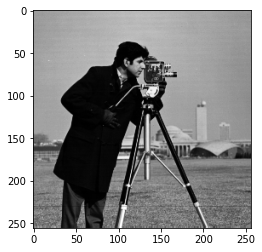

In [137]:
unshifted_image = np.fft.ifft2(np.fft.fftshift(np.fft.fft2(shifted_image_ift)))

plot1(np.uint8(np.clip(unshifted_image.real, 0, 255)))